Proceso de Análisis Exploratorio de Datos (EDA)

En este proyecto, me embarco en un análisis exhaustivo del sector de telecomunicaciones en Argentina, con un enfoque especial en el acceso a internet y otros servicios de comunicación. Mi objetivo es comprender a fondo el comportamiento de este sector, lo que permitirá a la empresa ofrecer servicios de mayor calidad y descubrir oportunidades de crecimiento.

Para lograrlo, comenzaré por explorar el dataset proporcionado, familiarizándome con su estructura y el tipo de información que contiene. Identificaré y analizaré los valores faltantes, lo que me permitirá decidir cómo manejarlos para no afectar la calidad del análisis.

Un aspecto crucial será la detección de valores atípicos, ya que estos pueden influir significativamente en los resultados. Utilizaré diversas visualizaciones para identificar estos outliers y evaluar su impacto en el contexto de los datos.

Además, prestaré atención a los registros duplicados, asegurándome de que cada dato en el dataset sea único y relevante para el análisis.

A través de un análisis descriptivo, buscaré patrones y tendencias en los datos, utilizando gráficos que no solo sean informativos, sino también visualmente atractivos. Mi enfoque se centrará en crear visualizaciones que cuenten una historia y resalten los aspectos más interesantes del comportamiento del sector.

Finalmente, documentaré mis observaciones y conclusiones a lo largo del proceso, asegurándome de que cada gráfico y análisis esté acompañado de una interpretación clara. 

En este proyecto descubrire y tendre la oportunidad de contribuir a la mejora de los servicios de telecomunicaciones en Argentina.

Esperando obtener los siguientes Resultados:

A partir de este EDA se espera obtener insights valiosos que permitan:

-Mejorar la calidad de servicio: Identificando los principales problemas y áreas de mejora.

-Aumentar la satisfacción del cliente: Comprendiendo las necesidades y expectativas de los usuarios.

-Optimizar la estrategia comercial: Identificando oportunidades de crecimiento y segmentos de mercado rentables.

# Instalamos e Importamos las Librerias de Python 

Instalamos las Librerias que usaremos para ejecutar nuestro Codigo

*Numpy

*Pandas

*Matplotlib

*Seaborn

*Geopandas

*Sqlalchemy

*Tabulate

In [145]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
# Importamos Las Librerias Necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from tabulate import tabulate



# Cargamos El Dataset a Evaluar

### 1.- Determinamos el Tamaño de los Datos

In [148]:
# Ruta desde el notebook al archivo .xlsx

ruta = '../1._DataSets\Internet.xlsx'

# Cargar el archivo Excel
df_internet = pd.read_excel(ruta)

# Mostrar las primeras filas del DataFrame
print(df_internet.head(5))

      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   850 Mbps  900 Mbps  999 Mbps 

In [149]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


Tenemos un DataFrame con 3065 entradas y 125 columnas, lo que indica que los datos son bastante extensos. Ademas, dentro del Archivo internet.xlsx, existen 15 hojas de Calculo. Las Cuales debemos analizar para conocer el Comportamiento de este Sector en Argentina. 

In [150]:
# Ya que el Archivo contiene varias Hojas, quiero visualizarlas todas. 

sheets = pd.read_excel(ruta, sheet_name=None)  # Se Cargaran todas las hojas en un diccionario

In [151]:
# Ahora podemos inspeccionar las hojas y ver qué columnas hay en cada una de ellas.

   # Listar los nombres de las hojas y mostrar las primeras filas de cada hoja
for sheet_name, data in sheets.items():
    print(f"Hoja: {sheet_name}")
    print(data.head(5), "\n")


Hoja: Acc_vel_loc_sinrangos
      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   8

In [152]:
# Obtener los nombres de las hojas de manera Resumida
sheet_names = list(sheets.keys())

# Imprimir los nombres
print(sheet_names)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


Gracias a esta Informacion, podre estructurar el analisis exploratorio de Datos (EDA), ya que tenemos varias Hojas de Calculo las cuales no todas son necesarias para mi analisis exploratorio. 

# Análisis Exploratorio de Datos (EDA)

En la actualidad, el acceso a internet es fundamental para el desarrollo social y económico de cualquier región. Este análisis se centra en la evaluación del acceso a internet en diversas provincias de Argentina a lo largo del tiempo, utilizando un conjunto de datos que abarca diferentes velocidades de conexión.

En total, se han examinado 15 hojas de cálculo que contienen información sobre accesos a internet, pero se ha identificado que varias de estas hojas repiten o dividen información similar, lo que dificulta un análisis claro y conciso. Entre estas, se destacan dos hojas: Accveloc_sinrangos y VelocidadsinRangos, que presentan datos detallados de velocidades por año y trimestre. Sin embargo, para simplificar el análisis, se ha optado por utilizar una hoja consolidada llamada Accesos por Velocidad, que resume la información en columnas clave: Año, Trimestre, Provincia y las diferentes velocidades de conexión.

Con el objetivo de realizar un análisis exploratorio de datos efectivo, se han seleccionado 6 hojas que proporcionan una visión clara y resumida del acceso a internet en las provincias analizadas. Este análisis permitirá identificar tendencias, patrones y anomalías en el acceso a internet, así como evaluar las velocidades más comunes y su distribución en el tiempo.

In [153]:
# Antes de Concatenar las Hojas de calculo de interes, quiero ver el tipo de Datos para cada Columna, y asi me aseguro que la informacion este bien luego que este Unida.

# Iterar sobre cada hoja y mostrar el tipo de dato de cada columna
for hoja in sheets:
    df = pd.read_excel(ruta, sheet_name=hoja)
    print(f"\nHoja: {hoja}")
    print(df.dtypes)  # Muestra el tipo de dato de cada columna de Todas Las Hojas de Calculo en el Datasets


Hoja: Acc_vel_loc_sinrangos
Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros         float64
               ...   
999 Mbps      float64
1000 Mbps     float64
1024 Mbps     float64
4000 Mbps     float64
10000 Mbps    float64
Length: 125, dtype: object

Hoja: Velocidad_sin_Rangos
Año           float64
Trimestre     float64
Provincia      object
Otros         float64
0,256 Mbps    float64
               ...   
5125 Mbps     float64
6000 Mbps     float64
7000 Mbps     float64
8000 Mbps     float64
10000 Mbps    float64
Length: 193, dtype: object

Hoja: Accesos_tecnologia_localidad
Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL              int64
CABLEMODEM        int64
DIAL UP           int64
FIBRA OPTICA      int64
OTROS             int64
SATELITAL         int64
WIMAX             int64
WIRELESS          int64
Total general     int64
dtype: object

Hoja: Velocidad % por prov
Año            

Hay Varias Columnas donde el Tipo de Dato no es el Adecuado. Ejemplo: Año, Trimestre Y Provincia. El tipo de Dato Varia entre Object y Float. Si vamos a realizar analisis numericos con estas Columnas, lo mas recomendable es que para el caso de Año y Trimestre, el tipo de Dato sea Integer por tratarse de Numeros Enteros, y para el caso de Provincia sea Categorial ya que es una variable categorica Nominal. 

In [154]:
# 1.- Primero Cargamos las Hojas de Calculo de Interes y las Unimos en un solo Dataframe para faciliatr el Analisis.

# Cargamos los Archivos
hoja1 = pd.read_excel(ruta, sheet_name= "Velocidad % por prov")
hoja2 = pd.read_excel(ruta, sheet_name= "Accesos Por Tecnología")
hoja3 = pd.read_excel(ruta, sheet_name= "Penetración-poblacion")
hoja4 = pd.read_excel(ruta, sheet_name= "Penetracion-hogares")  
hoja5 = pd.read_excel(ruta, sheet_name= "Accesos por velocidad") 
hoja6 = pd.read_excel(ruta, sheet_name= "Ingresos ")

# Unimos las hojas en solo DataFrame

datos_completos = pd.concat([hoja1, hoja2, hoja3, hoja4, hoja5, hoja6], ignore_index=True)

In [155]:
# 2.- Inspeccionamos los Datos, revisando las primeras Filas del DataFrame y su estructura de Datos para entenderlos mejor

# Muestra las primeras 10 filas en formato tabular
print(tabulate(datos_completos.head(10), headers='keys', tablefmt='psql'))

+----+-------+-------------+-----------------+--------------------------+--------+--------------+----------------+------------+---------+---------+----------------------------+--------------------------------+------------------+-----------------------+---------------------+----------------------+-----------------------+-----------------------+-------------+---------+-----------------------------+-----------+
|    |   Año |   Trimestre | Provincia       |   Mbps (Media de bajada) |   ADSL |   Cablemodem |   Fibra óptica |   Wireless |   Otros |   Total |   Accesos por cada 100 hab |   Accesos por cada 100 hogares |   HASTA 512 kbps |   + 512 Kbps - 1 Mbps |   + 1 Mbps - 6 Mbps |   + 6 Mbps - 10 Mbps |   + 10 Mbps - 20 Mbps |   + 20 Mbps - 30 Mbps |   + 30 Mbps |   OTROS |   Ingresos (miles de pesos) |   Periodo |
|----+-------+-------------+-----------------+--------------------------+--------+--------------+----------------+------------+---------+---------+----------------------------+

In [156]:
# 3.- Buscamos el tipo de dato de cada Columna

print(datos_completos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           4962 non-null   object 
 1   Trimestre                     4962 non-null   object 
 2   Provincia                     4920 non-null   object 
 3   Mbps (Media de bajada)        984 non-null    float64
 4   ADSL                          984 non-null    float64
 5   Cablemodem                    984 non-null    float64
 6   Fibra óptica                  984 non-null    float64
 7   Wireless                      984 non-null    float64
 8   Otros                         984 non-null    float64
 9   Total                         1968 non-null   float64
 10  Accesos por cada 100 hab      984 non-null    float64
 11  Accesos por cada 100 hogares  984 non-null    float64
 12  HASTA 512 kbps                984 non-null    float64
 13  + 5

Estos Resultados, me indican una discrepancia en los datos. En las 6 Hojas de Calculo que seleccione usando .info me dice que en todas mis columnas no hay valores Nulos, pero al usar Tabulate, Visualmente todas las Columnas poseen Valores NaN. 

Ya que:

.info(): Puede no detectar algunos tipos de valores faltantes, como cadenas vacías o valores especiales que no son considerados nulos por defecto.

.tabulate: Muestra una representación visual de los datos, incluyendo valores faltantes que pueden estar representados como NaN o espacios en blanco.

Puede deberse a diferentes formas de manejar los valores faltantes.


In [157]:
# Como primer Paso, Validare las Hojas Seleccionadas individualmente para ver los datos antes de la Union en el dataframe datos_completos

# Lista de las 6 hojas a evaluar
hojas_a_evaluar = ['Velocidad % por prov', 
                   'Accesos Por Tecnología', 
                   'Penetración-poblacion', 
                   'Penetracion-hogares', 
                   'Accesos por velocidad', 
                   'Ingresos ']  

# Leer el archivo Excel y seleccionar las hojas
excel_file = '../1._DataSets\Internet.xlsx'
df = pd.read_excel(excel_file, sheet_name=hojas_a_evaluar)

# Iterar sobre cada DataFrame (hoja)
for hoja, data in df.items():
    print(f"Evaluando hoja: {hoja}")
    # Comprobar si hay valores nulos usando isnull() y sum()
    valores_nulos = data.isnull().sum()
    if valores_nulos.sum() > 0:
        print("La hoja contiene valores NaN:")
        print(valores_nulos)
    else:
        print("La hoja no contiene valores NaN.")

Evaluando hoja: Velocidad % por prov
La hoja no contiene valores NaN.
Evaluando hoja: Accesos Por Tecnología
La hoja contiene valores NaN:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Evaluando hoja: Penetración-poblacion
La hoja no contiene valores NaN.
Evaluando hoja: Penetracion-hogares
La hoja no contiene valores NaN.
Evaluando hoja: Accesos por velocidad
La hoja contiene valores NaN:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
Evaluando hoja: Ingresos 
La hoja no contiene valores NaN.


Gracias a esta Comparacion en ambos Casos uniendo o no las Hojas de Calculo seleccionadas. En el Caso 1, se observó una cantidad significativa de valores nulos en varias columnas, lo que sugiere problemas más serios de recolección de datos. En contraste, la mayoría de las hojas en el Caso 2 están completas, excepto por algunos valores menores en la hoja de "Accesos Por Tecnología". Esto quiere decir que al unir todas las Hojas en un solo DataFrame pasaron muchos mas Valores de tipo NaN. Es un problema que afecta la integridad de datos y deben ser abordados antes de realizar cualquier análisis significativo. Por lo Tanto Continuare mi analisis Con las Hojas por separado.

## 2.- Categorizar las Variables

Continuare con la Categorizacion de las Variables usando de forma separada las Hojas de Calculo seleccionadas para el analisis.

In [198]:
# Comenzare con Visualizar las Columnas en cada Hoja de Calculo

# Cargar el archivo de Excel
archivo_excel = '../1._DataSets/Internet.xlsx' 

# Leer todas las hojas de cálculo en un diccionario
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Mostrar las columnas en cada hoja de cálculo
for nombre_hoja, df in hojas.items():
    print(f"Hoja: {nombre_hoja}")
    print("Columnas:")
    print(df.columns.tolist())
    print("\n")  # Dejar un espacio entre cada Hoja


Hoja: Acc_vel_loc_sinrangos
Columnas:
['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros', '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '35 Mbps', '36 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '80 Mbps', '85 Mbps', '90 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 M

Basandome en la Informacion proporcionada por las Hojas de Calculo Seleccionadas podre categorizar las posibles variables para el analisis exploratorio de Datos.

# Resumiendo Variables 

1. Variables numéricas:

Continuas:
Velocidad de conexión: Expresada como un porcentaje o en megabits por segundo (Mbps).
Penetración: Expresada como un porcentaje de la población o de los hogares con acceso a internet.
Ingresos: Expresados en miles de pesos.
Discretas:
Accesos: Cantidad de conexiones a internet, ya sea por tecnología o por rango de velocidad.

2. Variables categóricas:

Nominales:
Provincia: Indica la región geográfica.
Tecnología: Tipo de conexión a internet (ej: ADSL, fibra óptica, móvil).
Ordinales:
Velocidad de conexión (rangos): Si la velocidad se agrupa en rangos (ej: baja, media, alta).



## 3.- Limpieza y Validacion de los Datos

La limpieza y validación de los datos es una etapa fundamental. Por lo tanto con este proceso garantizamos la calidad de los datos y la confiabilidad de los resultados obtenidos, para luego finalizar con las relaciones de nuestras Variables.

### Analisis de Valores Faltantes por cada Hoja de Calculo Seleccionada

In [199]:

# Análisis de la primera hoja llamada Velocidad % por prov
nombre_hoja_1 = 'Velocidad % por prov'  
df_hoja_1 = hojas[nombre_hoja_1]

print(f"--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_1} ---")
print("Valores faltantes por columna:")
print(df_hoja_1.isnull().sum())

--- Análisis de Valores Faltantes en la Hoja: Velocidad % por prov ---
Valores faltantes por columna:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


In [200]:
# Análisis de la segunda hoja llamada Accesos Por Tecnología
nombre_hoja_2 = 'Accesos Por Tecnología' 
df_hoja_2 = hojas[nombre_hoja_2]

print(f"\n--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_2} ---")
print("Valores faltantes por columna:")
print(df_hoja_2.isnull().sum())


--- Análisis de Valores Faltantes en la Hoja: Accesos Por Tecnología ---
Valores faltantes por columna:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


In [201]:
# Análisis de la tercera hoja llamada Penetración-poblacion
nombre_hoja_3 = 'Penetración-poblacion' 
df_hoja_3 = hojas[nombre_hoja_3]

print(f"\n--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_3} ---")
print("Valores faltantes por columna:")
print(df_hoja_3.isnull().sum())


--- Análisis de Valores Faltantes en la Hoja: Penetración-poblacion ---
Valores faltantes por columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64


In [202]:
# Análisis de la cuarta hoja llamada Penetracion-hogares
nombre_hoja_4 = 'Penetracion-hogares' 
df_hoja_3 = hojas[nombre_hoja_4]

print(f"\n--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_4} ---")
print("Valores faltantes por columna:")
print(df_hoja_3.isnull().sum())


--- Análisis de Valores Faltantes en la Hoja: Penetracion-hogares ---
Valores faltantes por columna:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


In [203]:
# Análisis de la quinta hoja llamada Accesos por velocidad
nombre_hoja_5 = 'Accesos por velocidad'  
df_hoja_1 = hojas[nombre_hoja_5]

print(f"--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_5} ---")
print("Valores faltantes por columna:")
print(df_hoja_1.isnull().sum())

--- Análisis de Valores Faltantes en la Hoja: Accesos por velocidad ---
Valores faltantes por columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


In [204]:
# Análisis de la sexta hoja llamada Ingresos
nombre_hoja_6 = 'Ingresos '  
df_hoja_1 = hojas[nombre_hoja_6]

print(f"--- Análisis de Valores Faltantes en la Hoja: {nombre_hoja_6} ---")
print("Valores faltantes por columna:")
print(df_hoja_1.isnull().sum())

--- Análisis de Valores Faltantes en la Hoja: Ingresos  ---
Valores faltantes por columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64


Ya que la mayoria de las Hojas de Calculos no poseen Datos Faltantes, lo cual es muy bueno para nuestros Datos. Procedere a Evaluar la Proporcion de los Datos Faltantes en la Hoja Accesos por Tecnologia, ya que este paso es crucial para luego decidir como tratar estos valores.

In [205]:
# Cargar el archivo Excel

archivo_excel = '../1._DataSets/internet.xlsx'
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Cargar la hoja "accesos por tecnologia"
df_accesos = hojas['Accesos Por Tecnología']

In [206]:
# Calcular el total de valores
total_valores = df_accesos.size

# Calcular el total de valores faltantes
total_faltantes = df_accesos.isnull().sum().sum()
print("Totales de Valores Faltantes: ", total_faltantes, "Valores Faltantes en Total")

# Calcular la proporción total de datos faltantes
proporcion_total_faltantes = total_faltantes / total_valores
print(f"Proporción total de datos faltantes: {proporcion_total_faltantes:.2%}")

# Calcular la proporción de datos faltantes por columna
proporcion_faltantes_por_columna = df_accesos.isnull().mean() * 100  
print("\nProporción de datos faltantes por columna:")
print(proporcion_faltantes_por_columna)


Totales de Valores Faltantes:  16 Valores Faltantes en Total
Proporción total de datos faltantes: 0.18%

Proporción de datos faltantes por columna:
Año             0.10142
Trimestre       0.10142
Provincia       0.20284
ADSL            0.20284
Cablemodem      0.20284
Fibra óptica    0.20284
Wireless        0.20284
Otros           0.20284
Total           0.20284
dtype: float64


Dado que solo tengo 16 valores faltantes, que representan aproximadamente el 0.18% del total de datos en la hoja de cálculo, procedere a la imputación de esos valores.

In [207]:
# Cargamos nuestro archivo 

archivo_excel = '../1._DataSets/internet.xlsx'
hojas = pd.read_excel(archivo_excel, sheet_name=None)
df_accesos = hojas['Accesos Por Tecnología']

# Imputación para columnas categóricas

for column in ['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    if df_accesos[column].isnull().sum() > 0:  # Ya que tenemos valores faltantes
        
        # Imputamos con la moda
        moda = df_accesos[column].mode()[0]
        df_accesos[column].fillna(moda, inplace=True)

# Mostrar valores faltantes después de la imputación
print("Valores faltantes por columna después de la imputación:")
print(df_accesos.isnull().sum())

Valores faltantes por columna después de la imputación:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


### Visualizacion de la Distribucion de nuestros Datos

In [168]:
# Cargamos nuestro Archivo Internet

archivo_excel = '../1._DataSets/internet.xlsx'
hojas = pd.read_excel(archivo_excel, sheet_name=None)  # Se cargan Todas Las Hojas



In [169]:
# Visualizar La Distribucion

# Primero especificamos las Hojas que vamos a Visualizar

hojas_seleccionadas = [
    'Velocidad % por prov',
    'Accesos Por Tecnología',
    'Penetración-poblacion',
    'Penetracion-hogares',
    'Accesos por velocidad',
    'Ingresos '
]


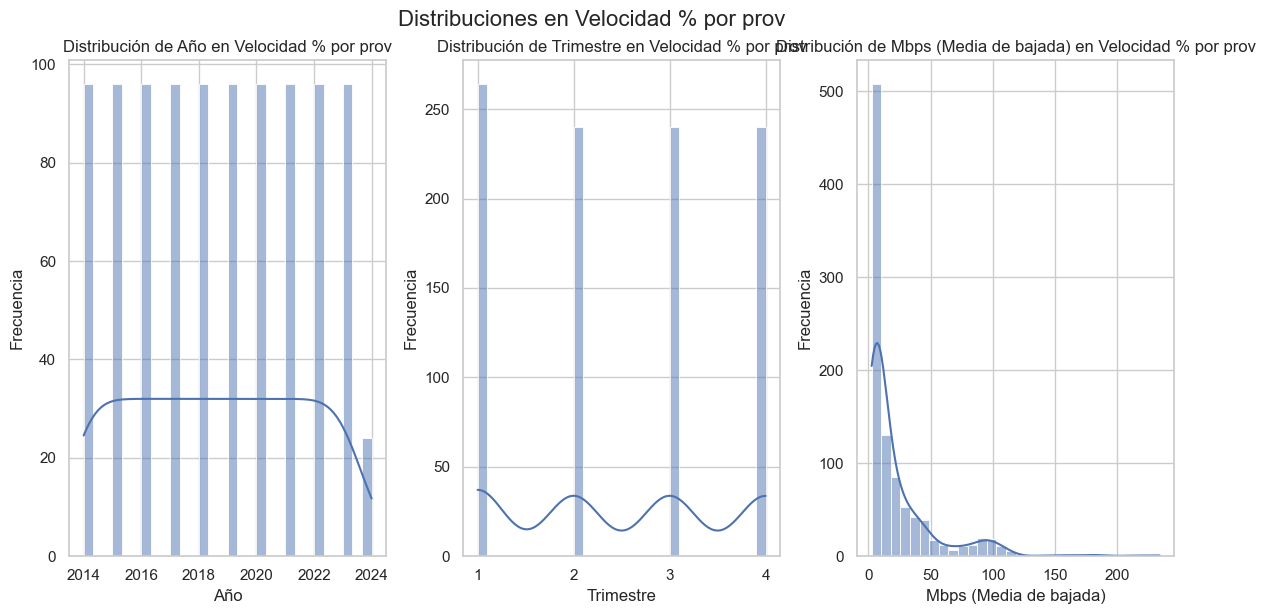

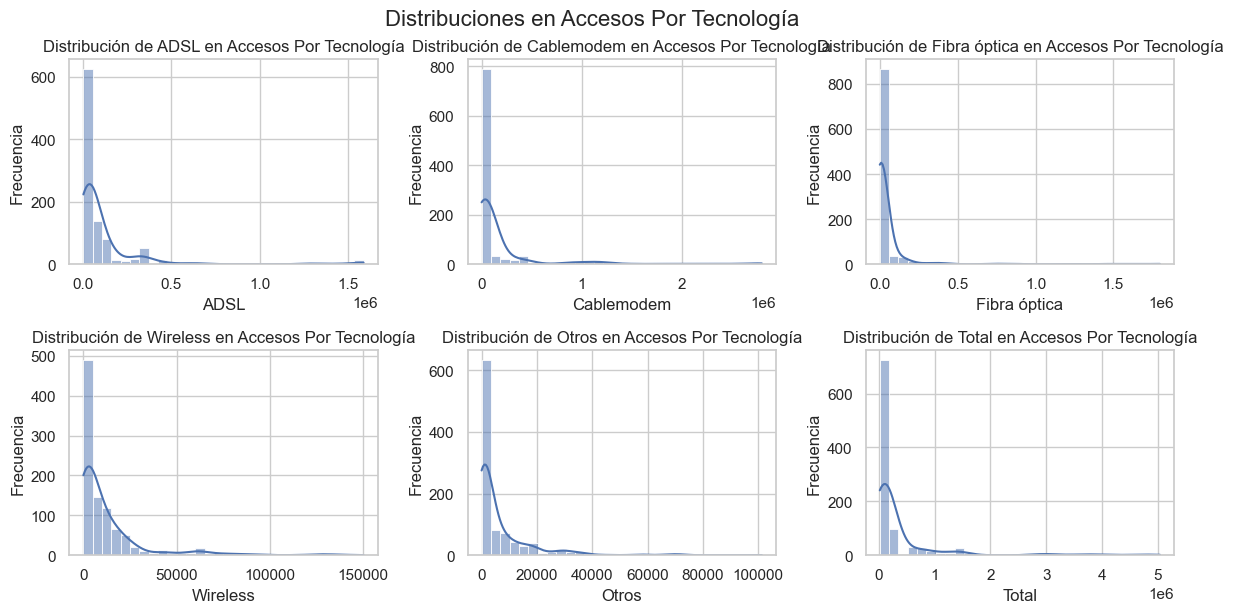

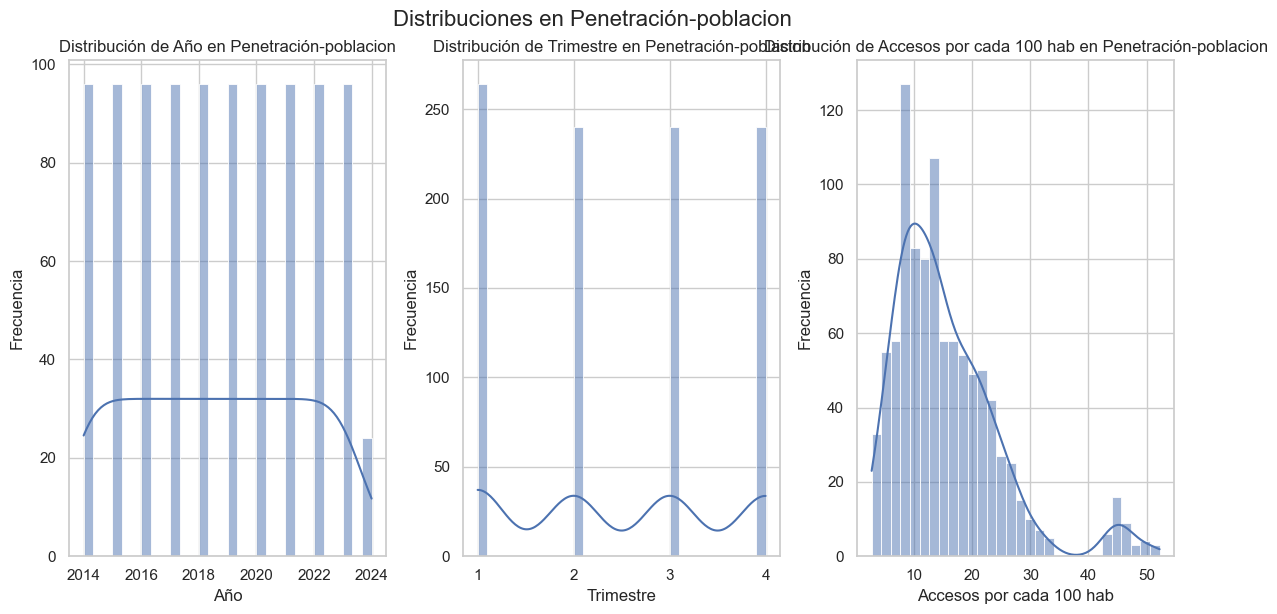

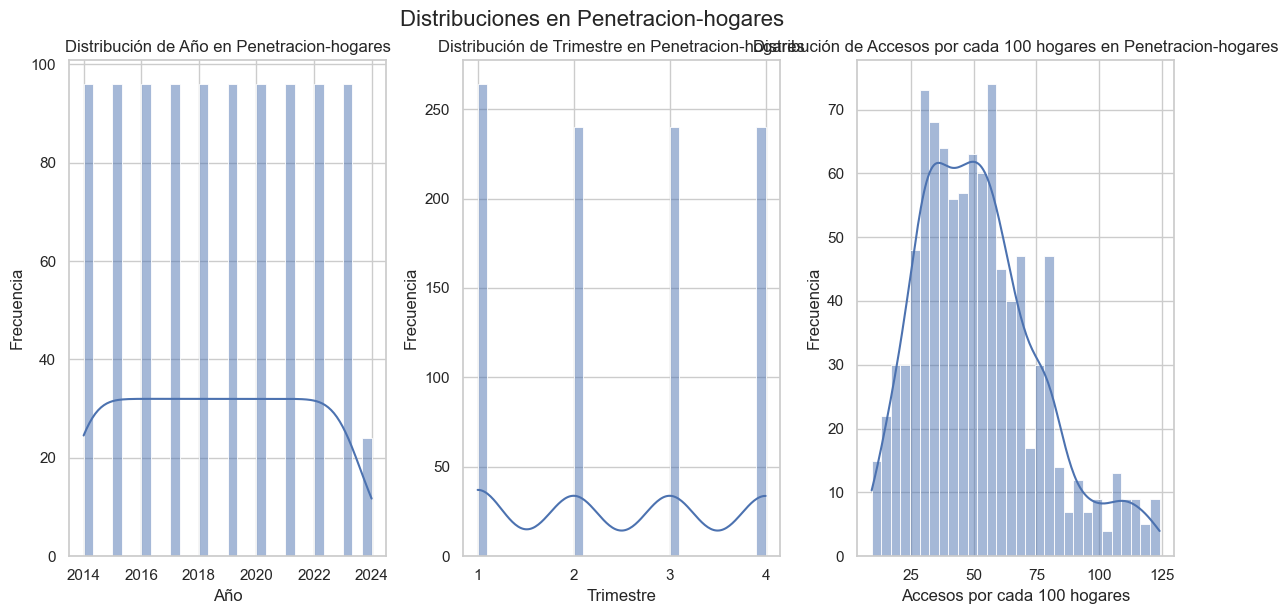

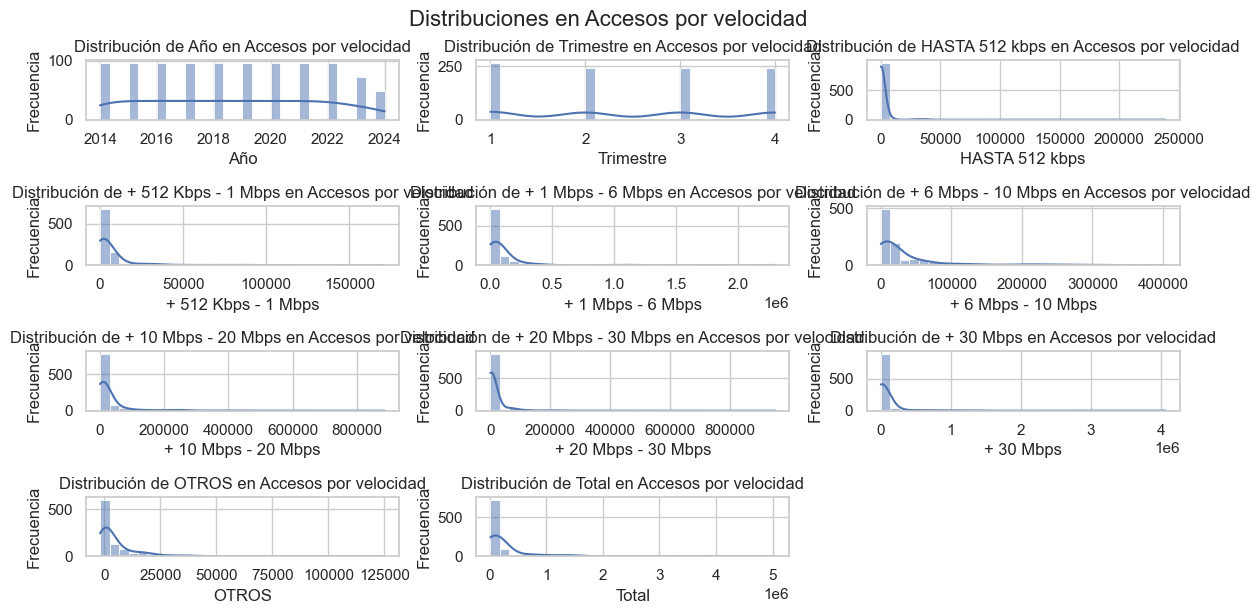

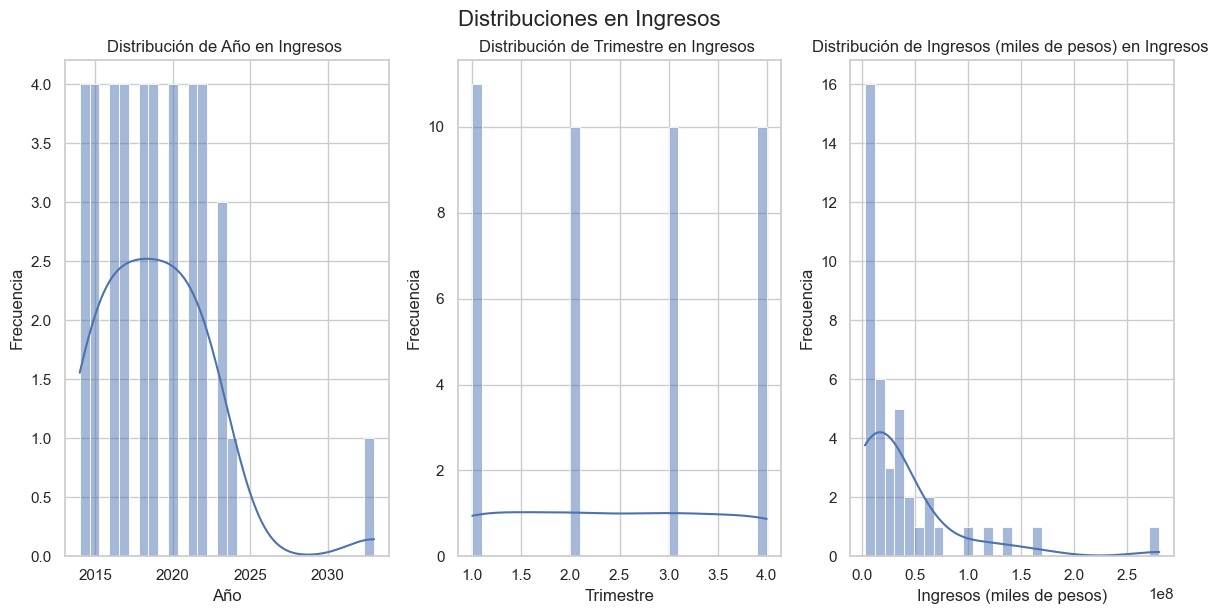

In [170]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Iterar sobre las hojas seleccionadas
for nombre_hoja in hojas_seleccionadas:
    if nombre_hoja in hojas:
        df = hojas[nombre_hoja]
        plt.figure(figsize=(12, 6))

        # Obtener columnas numéricas
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        cols = 3  # Número de columnas en el subplot
        rows = np.ceil(len(numeric_columns) / cols).astype(int)  # Calcular el número de filas necesarias

        # Graficar la distribución de las columnas numéricas
        for i, column in enumerate(numeric_columns):
            plt.subplot(rows, cols, i + 1)  # Cambiar el índice para que comience desde 1
            sns.histplot(df[column], bins=30, kde=True)
            plt.title(f'Distribución de {column} en {nombre_hoja}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')

        plt.tight_layout()
        plt.suptitle(f'Distribuciones en {nombre_hoja}', fontsize=16, y=1.02)  # Título general de la hoja
        plt.show()
    else:
        print(f"La hoja '{nombre_hoja}' no se encuentra en el archivo.")

Con este enfoque, podemos analizar la distribución de los datos solo en las hojas que hemos seleccionado para nuestro analisis. Se generan histogramas y gráficos de densidad solo para las columnas numéricas. Ya que son herramientas visuales fundamentales para explorar y entender la distribución de datos en un conjunto. 

### Valores Atipicos en nuestros Datos

In [171]:
# Listamos las hojas seleccionadas a evaluar
hojas_a_evaluar = ['Velocidad % por prov', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Accesos por velocidad', 'Ingresos '] 

# Leer el archivo Excel y seleccionar las hojas
excel_file = '../1._DataSets/internet.xlsx'
df = pd.read_excel(excel_file, sheet_name=hojas_a_evaluar)

# Iterar sobre cada DataFrame (hoja)
for hoja, data in df.items():
    print(f"Evaluando hoja: {hoja}")
    # Comprobar si hay valores nulos usando isnull() y sum()
    valores_nulos = data.isnull().sum()
    if valores_nulos.sum() > 0:
        print("La hoja contiene valores NaN:")
        print(valores_nulos)
    else:
        print("La hoja no contiene valores NaN.")

Evaluando hoja: Velocidad % por prov
La hoja no contiene valores NaN.
Evaluando hoja: Accesos Por Tecnología
La hoja contiene valores NaN:
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Evaluando hoja: Penetración-poblacion
La hoja no contiene valores NaN.
Evaluando hoja: Penetracion-hogares
La hoja no contiene valores NaN.
Evaluando hoja: Accesos por velocidad
La hoja contiene valores NaN:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64
Evaluando hoja: Ingresos 
La hoja no contiene valores NaN.


Como resultado se obtienen varios Valores NaN, en nuestras Columnas Accesos por Tecnologia y Accesos por Velocidad. El resultado por Columna es que son muy pocos. Optare por Eliminar las Filas que los contienen.  

Pero primero creare un nuevo archivo Excel que contenga solo las seis hojas de cálculo que estoy analizando, Para Unir estas Hojas luego de que la Data este Limpia.

In [213]:
# Cargar el archivo Excel original
archivo_excel = '../1._DataSets/internet.xlsx'  

# Nombres de las hojas que deseas incluir en el nuevo archivo
hojas_a_incluir = [
    'Velocidad % por prov',
    'Accesos Por Tecnología',
    'Penetración-poblacion',
    'Penetracion-hogares',
    'Accesos por velocidad',
    'Ingresos '
]

# Crear un nuevo archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'  

with pd.ExcelWriter(Internet_Limpio) as writer:
    for hoja in hojas_a_incluir:
        # Cargar la hoja específica
        df = pd.read_excel(archivo_excel, sheet_name=hoja)
        # Guardar la hoja en el nuevo archivo
        df.to_excel(writer, sheet_name=hoja, index=False)

print(f"Se ha creado un nuevo archivo Excel con las hojas especificadas: {Internet_Limpio}")

Se ha creado un nuevo archivo Excel con las hojas especificadas: ../6._DataSets_Limpio/internet_nuevo.xlsx


In [214]:
# Ahora si procedemos a Eliminar Valores NaN

# Cargamos el nuevo archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'  

# Procesar cada hoja
for hoja in hojas_a_incluir:
    # Cargar la hoja específica
    df = pd.read_excel(Internet_Limpio, sheet_name=hoja)

    # Contar valores NaN antes de eliminar
    valores_nan_iniciales = df.isna().sum().sum()  # Suma total de NaN en el DataFrame
    print(f"Hoja '{hoja}': {valores_nan_iniciales} valores NaN encontrados.")

    # Eliminar filas con valores NaN
    df_limpio = df.dropna()

    # Contar valores NaN después de eliminar
    valores_nan_finales = df_limpio.isna().sum().sum()
    print(f"Hoja '{hoja}': {valores_nan_finales} valores NaN restantes después de la eliminación.")

    # Sobrescribir el DataFrame limpio en la misma hoja
    with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        df_limpio.to_excel(writer, sheet_name=hoja, index=False)

    print(f"Se han eliminado los valores NaN de la hoja '{hoja}' y se ha sobrescrito el archivo.")

# Imprimir mensaje final
print("Todos los valores NaN han sido procesados y sobrescritos en el nuevo archivo.")

Hoja 'Velocidad % por prov': 0 valores NaN encontrados.
Hoja 'Velocidad % por prov': 0 valores NaN restantes después de la eliminación.
Se han eliminado los valores NaN de la hoja 'Velocidad % por prov' y se ha sobrescrito el archivo.
Hoja 'Accesos Por Tecnología': 16 valores NaN encontrados.
Hoja 'Accesos Por Tecnología': 0 valores NaN restantes después de la eliminación.
Se han eliminado los valores NaN de la hoja 'Accesos Por Tecnología' y se ha sobrescrito el archivo.
Hoja 'Penetración-poblacion': 0 valores NaN encontrados.
Hoja 'Penetración-poblacion': 0 valores NaN restantes después de la eliminación.
Se han eliminado los valores NaN de la hoja 'Penetración-poblacion' y se ha sobrescrito el archivo.
Hoja 'Penetracion-hogares': 0 valores NaN encontrados.
Hoja 'Penetracion-hogares': 0 valores NaN restantes después de la eliminación.
Se han eliminado los valores NaN de la hoja 'Penetracion-hogares' y se ha sobrescrito el archivo.
Hoja 'Accesos por velocidad': 6 valores NaN encontrad

Luego de Eliminar Valores Atipicos (NaN), Continuare con la union de las Hojas de Calculo

In [215]:
# Listare Primero las Hojas de Calculo dentro del DataFrame para asegurarme

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'  

# Crear un objeto ExcelFile para acceder a las hojas
excel_file = pd.ExcelFile(Internet_Limpio)

# Listar las hojas de cálculo
hojas = excel_file.sheet_names

# Imprimir las hojas de cálculo
print("Hojas de cálculo en el archivo Excel:")
for hoja in hojas:
    print(hoja)

Hojas de cálculo en el archivo Excel:
Velocidad % por prov
Accesos Por Tecnología
Penetración-poblacion
Penetracion-hogares
Accesos por velocidad
Ingresos 


Tratare las Hojas de Calculo por separado para evitar Futuros Valores NaN.

In [216]:

# Analizaremos la Hoja de Calculo Velocidad % por Prov

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Velocidad % por prov'

df_velocidad = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_velocidad.dtypes)

# Identificar valores nulos
valores_nulos = df_velocidad.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_velocidad.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_velocidad.info())


Tipos de dato de cada columna:
Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

Número de valores nulos en cada columna:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Número de valores NaN en cada columna:
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
m

In [217]:
# Cambiare el tipo de Dato de la Columna Provincia a Category

# Cambiar el tipo de dato de la columna 'Provincia' a category
df_velocidad['Provincia'] = df_velocidad['Provincia'].astype('category')

# Verificar el cambio
print("Nuevo tipo de dato de la columna 'Provincia':", df_velocidad['Provincia'].dtype)



Nuevo tipo de dato de la columna 'Provincia': category


In [218]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_velocidad.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)



Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [253]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_velocidad, headers='keys', tablefmt='psql', showindex=False)) 

+-------+-------------+---------------------+--------------------------+
|   Año |   Trimestre | Provincia           |   Mbps (Media de bajada) |
|-------+-------------+---------------------+--------------------------|
|  2024 |           1 | Buenos Aires        |                159.13    |
|  2024 |           1 | Capital Federal     |                229.94    |
|  2024 |           1 | Catamarca           |                 91.45    |
|  2024 |           1 | Chaco               |                107.51    |
|  2024 |           1 | Chubut              |                 20.5     |
|  2024 |           1 | Córdoba             |                114.89    |
|  2024 |           1 | Corrientes          |                102.49    |
|  2024 |           1 | Entre Ríos          |                101.36    |
|  2024 |           1 | Formosa             |                 83.8     |
|  2024 |           1 | Jujuy               |                 47.52    |
|  2024 |           1 | La Pampa            |      

In [220]:
# Analizaremos la Hoja de Calculo Accesos Por Tecnología

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Accesos Por Tecnología'
df_acceso_tecnologia = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_acceso_tecnologia.dtypes)

# Identificar valores nulos
valores_nulos = df_acceso_tecnologia.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_acceso_tecnologia.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_acceso_tecnologia.info())


Tipos de dato de cada columna:
Año             object
Trimestre       object
Provincia       object
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
dtype: object

Número de valores nulos en cada columna:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Número de valores NaN en cada columna:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           984 non-null    object
 1   Trimestre     984 non-null    object
 2   Provincia     9

In [221]:
# Cambiare el tipo de Dato de las Columnas Año, Trimestre y  Provincia.

# Cambiar el tipo de dato de las Columnas "Año" y "Trimestre" a int
df_acceso_tecnologia['Año'] = df_acceso_tecnologia['Año'].astype('int')
df_acceso_tecnologia['Trimestre'] = df_acceso_tecnologia['Trimestre'].astype('int')

# Cambiar el tipo de dato de la columna 'Provincia' a category
df_acceso_tecnologia['Provincia'] = df_acceso_tecnologia['Provincia'].astype('category')

# Verificar el cambio
print("Nuevo tipo de dato de la columna 'Año':", df_acceso_tecnologia['Año'].dtype)
print("Nuevo tipo de dato de la columna 'Trimestre':", df_acceso_tecnologia['Trimestre'].dtype)
print("Nuevo tipo de dato de la columna 'Provincia':", df_acceso_tecnologia['Provincia'].dtype)

ValueError: invalid literal for int() with base 10: '2019 *'

Este valor 2019 * indentificado como valor no valido / invalido se debe eliminar del dataframe. Para que no afecte nuestro analisis.

In [222]:
# Identifiquemos Valores Invalidos en la Columna Año de la Hoja Accesos por Tecnologia. 

# Identificar valores no numéricos
no_numericos = df_acceso_tecnologia[pd.to_numeric(df_acceso_tecnologia['Año'], errors='coerce').isnull()]['Año']
print(no_numericos)

432    2019 *
433    2019 *
434    2019 *
435    2019 *
436    2019 *
        ...  
499    2019 *
500    2019 *
501    2019 *
502    2019 *
503    2019 *
Name: Año, Length: 72, dtype: object


In [223]:
# Eliminamos las filas donde la columna 'Año' es igual a "2019 *"", a "*" y el año 2033.

df_acceso_tecnologia = df_acceso_tecnologia[df_acceso_tecnologia['Año'] != '2019 *']
df_acceso_tecnologia = df_acceso_tecnologia[df_acceso_tecnologia['Año'] != '*']
df_acceso_tecnologia = df_acceso_tecnologia[df_acceso_tecnologia['Año'] != '2033']

# Aseguramos que el valor este eliminado

print(df_acceso_tecnologia[df_acceso_tecnologia['Año'] == '2019 *'])
print(df_acceso_tecnologia[df_acceso_tecnologia['Año'] == '*'])
print(df_acceso_tecnologia[df_acceso_tecnologia['Año'] == '2033'])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []
Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []
Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []


In [236]:
# Se vuelve a intentar el cambio, luego de Eliminar el Valor 2019 *.

# Cambiar el tipo de dato de las Columnas "Año" y "Trimestre" a int
df_acceso_tecnologia['Año'] = df_acceso_tecnologia['Año'].astype('int')
df_acceso_tecnologia['Trimestre'] = df_acceso_tecnologia['Trimestre'].astype('int')

# Cambiar el tipo de dato de la columna 'Provincia' a category
df_acceso_tecnologia['Provincia'] = df_acceso_tecnologia['Provincia'].astype('category')

# # Cambiar el tipo de dato de la columna 'Provincia' a category
df_acceso_tecnologia['ADSL'] = df_acceso_tecnologia['ADSL'].astype('float')
df_acceso_tecnologia['Cablemodem'] = df_acceso_tecnologia['Cablemodem'].astype('float')
df_acceso_tecnologia['Fibra óptica'] = df_acceso_tecnologia['Fibra óptica'].astype('float')
df_acceso_tecnologia['Wireless'] = df_acceso_tecnologia['Wireless'].astype('float')
df_acceso_tecnologia['Otros'] = df_acceso_tecnologia['Otros'].astype('float')
df_acceso_tecnologia['Total'] = df_acceso_tecnologia['Total'].astype('float')

# Verificar el cambio
print("Nuevo tipo de dato de la columna 'Año':", df_acceso_tecnologia['Año'].dtype)
print("Nuevo tipo de dato de la columna 'Trimestre':", df_acceso_tecnologia['Trimestre'].dtype)
print("Nuevo tipo de dato de la columna 'Provincia':", df_acceso_tecnologia['Provincia'].dtype)
print("Nuevo tipo de dato de la columna 'ADSL':", df_acceso_tecnologia['ADSL'].dtype)
print("Nuevo tipo de dato de la columna 'Cablemodem':", df_acceso_tecnologia['Cablemodem'].dtype)
print("Nuevo tipo de dato de la columna 'Fibra óptica':", df_acceso_tecnologia['Fibra óptica'].dtype)
print("Nuevo tipo de dato de la columna 'Wireless':", df_acceso_tecnologia['Wireless'].dtype)
print("Nuevo tipo de dato de la columna 'Otros':", df_acceso_tecnologia['Otros'].dtype)
print("Nuevo tipo de dato de la columna 'Total':", df_acceso_tecnologia['Total'].dtype)

Nuevo tipo de dato de la columna 'Año': int32
Nuevo tipo de dato de la columna 'Trimestre': int32
Nuevo tipo de dato de la columna 'Provincia': category
Nuevo tipo de dato de la columna 'ADSL': float64
Nuevo tipo de dato de la columna 'Cablemodem': float64
Nuevo tipo de dato de la columna 'Fibra óptica': float64
Nuevo tipo de dato de la columna 'Wireless': float64
Nuevo tipo de dato de la columna 'Otros': float64
Nuevo tipo de dato de la columna 'Total': float64


In [237]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_acceso_tecnologia.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)

Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [254]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_acceso_tecnologia, headers='keys', tablefmt='psql', showindex=False)) 

+-------+-------------+---------------------+------------------+------------------+------------------+------------+---------+------------------+
|   Año |   Trimestre | Provincia           |             ADSL |       Cablemodem |     Fibra óptica |   Wireless |   Otros |            Total |
|-------+-------------+---------------------+------------------+------------------+------------------+------------+---------+------------------|
|  2024 |           1 | Buenos Aires        | 203297           |      2.79066e+06 |      1.79901e+06 |     150290 |  101294 |      5.04456e+06 |
|  2024 |           1 | Capital Federal     |  70108           |      1.17748e+06 | 203756           |       4493 |   48879 |      1.50471e+06 |
|  2024 |           1 | Catamarca           |   5901           |  11025           |  56542           |       1384 |      81 |  74933           |
|  2024 |           1 | Chaco               |  11343           |  58929           |  64463           |       8404 |   12404 | 1555

In [239]:
# Analizaremos la Hoja de Calculo Penetracion por Poblacion

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Penetración-poblacion'
df_penetracion_poblacion = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_penetracion_poblacion.dtypes)

# Identificar valores nulos
valores_nulos = df_penetracion_poblacion.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_penetracion_poblacion.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_penetracion_poblacion.info())

Tipos de dato de cada columna:
Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object

Número de valores nulos en cada columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Número de valores NaN en cada columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtype

In [240]:
# Cambiar el tipo de dato de la columna 'Provincia' a category
df_penetracion_poblacion['Provincia'] = df_penetracion_poblacion['Provincia'].astype('category')
print("Nuevo tipo de dato de la columna 'Provincia':", df_penetracion_poblacion['Provincia'].dtype)


Nuevo tipo de dato de la columna 'Provincia': category


In [241]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_penetracion_poblacion.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)

Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [257]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_penetracion_poblacion, headers='keys', tablefmt='psql', showindex=False))

+-------+-------------+---------------------+----------------------------+
|   Año |   Trimestre | Provincia           |   Accesos por cada 100 hab |
|-------+-------------+---------------------+----------------------------|
|  2024 |           1 | Buenos Aires        |                   27.8     |
|  2024 |           1 | Capital Federal     |                   48.78    |
|  2024 |           1 | Catamarca           |                   17.5     |
|  2024 |           1 | Chaco               |                   12.48    |
|  2024 |           1 | Chubut              |                   26.02    |
|  2024 |           1 | Córdoba             |                   27.77    |
|  2024 |           1 | Corrientes          |                   13.68    |
|  2024 |           1 | Entre Ríos          |                   20.72    |
|  2024 |           1 | Formosa             |                   10.08    |
|  2024 |           1 | Jujuy               |                   14.74    |
|  2024 |           1 | L

In [242]:
# Analizaremos la Hoja de Calculo Penetracion por hogares

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Penetración-poblacion'
df_penetracion_hogares = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_penetracion_hogares.dtypes)

# Identificar valores nulos
valores_nulos = df_penetracion_hogares.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_penetracion_hogares.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_penetracion_hogares.info())

Tipos de dato de cada columna:
Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object

Número de valores nulos en cada columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Número de valores NaN en cada columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtype

In [243]:
# Cambiar el tipo de dato de la columna 'Provincia' a category
df_penetracion_hogares['Provincia'] = df_penetracion_hogares['Provincia'].astype('category')
print("Nuevo tipo de dato de la columna 'Provincia':", df_penetracion_hogares['Provincia'].dtype)

Nuevo tipo de dato de la columna 'Provincia': category


In [244]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_penetracion_hogares.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)

Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [255]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_penetracion_hogares, headers='keys', tablefmt='psql', showindex=False))

+-------+-------------+---------------------+----------------------------+
|   Año |   Trimestre | Provincia           |   Accesos por cada 100 hab |
|-------+-------------+---------------------+----------------------------|
|  2024 |           1 | Buenos Aires        |                   27.8     |
|  2024 |           1 | Capital Federal     |                   48.78    |
|  2024 |           1 | Catamarca           |                   17.5     |
|  2024 |           1 | Chaco               |                   12.48    |
|  2024 |           1 | Chubut              |                   26.02    |
|  2024 |           1 | Córdoba             |                   27.77    |
|  2024 |           1 | Corrientes          |                   13.68    |
|  2024 |           1 | Entre Ríos          |                   20.72    |
|  2024 |           1 | Formosa             |                   10.08    |
|  2024 |           1 | Jujuy               |                   14.74    |
|  2024 |           1 | L

In [245]:
# Analizaremos la Hoja de Calculo Accesos por Velocidad

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Accesos por velocidad'
df_accesos_velocidad = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_accesos_velocidad.dtypes)

# Identificar valores nulos
valores_nulos = df_accesos_velocidad.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_accesos_velocidad.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_accesos_velocidad.info())



Tipos de dato de cada columna:
Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                    int64
Total                  float64
dtype: object

Número de valores nulos en cada columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

Número de valores NaN en cada columna:
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 2

In [247]:

# Cambiar el tipo de dato de la columna 'Provincia' a category
df_accesos_velocidad['Provincia'] = df_accesos_velocidad['Provincia'].astype('category')
df_accesos_velocidad['OTROS'] = df_accesos_velocidad['OTROS'].astype('float')


# Verificar el cambio
print("Nuevo tipo de dato de la columna 'Provincia':", df_accesos_velocidad['Provincia'].dtype)
print("Nuevo tipo de dato de la columna 'OTROS':", df_accesos_velocidad['OTROS'].dtype)


Nuevo tipo de dato de la columna 'Provincia': category
Nuevo tipo de dato de la columna 'OTROS': float64


In [248]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_accesos_velocidad.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)

Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [256]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_accesos_velocidad, headers='keys', tablefmt='psql', showindex=False))

+-------+-------------+---------------------+------------------+-----------------------+---------------------+----------------------+-----------------------+-----------------------+------------------+---------+------------------+
|   Año |   Trimestre | Provincia           |   HASTA 512 kbps |   + 512 Kbps - 1 Mbps |   + 1 Mbps - 6 Mbps |   + 6 Mbps - 10 Mbps |   + 10 Mbps - 20 Mbps |   + 20 Mbps - 30 Mbps |        + 30 Mbps |   OTROS |            Total |
|-------+-------------+---------------------+------------------+-----------------------+---------------------+----------------------+-----------------------+-----------------------+------------------+---------+------------------|
|  2024 |           1 | Buenos Aires        |         26002    |               22510   |    221185           |             233225   |              241778   |             106418    |      4.06829e+06 |  125147 |      5.04456e+06 |
|  2024 |           1 | Capital Federal     |           516    |                

In [249]:
# Analizaremos la Hoja de Calculo Ingresos

# Cargar el archivo Excel
Internet_Limpio = '../6._DataSets_Limpio/internet_nuevo.xlsx'    

# Cargar la hoja específica
nombre_hoja = 'Ingresos '
df_ingresos = pd.read_excel(Internet_Limpio, sheet_name=nombre_hoja)

# Mostrar el tipo de dato de cada columna
print("Tipos de dato de cada columna:")
print(df_ingresos.dtypes)

# Identificar valores nulos
valores_nulos = df_ingresos.isnull().sum()
print("\nNúmero de valores nulos en cada columna:")
print(valores_nulos)

# Identificar valores NaN
valores_nan = df_ingresos.isna().sum()
print("\nNúmero de valores NaN en cada columna:")
print(valores_nan)

# Resumen de datos
print("\nResumen del DataFrame:")
print(df_ingresos.info())

Tipos de dato de cada columna:
Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object

Número de valores nulos en cada columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Número de valores NaN en cada columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null  

In [250]:
# Eliminamos la Columna Periodo ya que la informacion ya la ubicamos en otras columnas

df_ingresos = df_ingresos.drop(columns=['Periodo'])

In [251]:
# Guardar los cambios en el archivo Excel original

with pd.ExcelWriter(Internet_Limpio, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_ingresos.to_excel(writer, sheet_name=nombre_hoja, index=False)

print("Los cambios se han guardado en el archivo:", archivo_excel)

Los cambios se han guardado en el archivo: ../1._DataSets/internet.xlsx


In [258]:
# Visualizar la Hoja en Tabulate, para visualizar que los Datos sean Correctos

print(tabulate(df_ingresos, headers='keys', tablefmt='psql', showindex=False))

+-------+-------------+-----------------------------+
|   Año |   Trimestre |   Ingresos (miles de pesos) |
|-------+-------------+-----------------------------|
|  2024 |           1 |                 2.80419e+08 |
|  2023 |           4 |                 1.67376e+08 |
|  2023 |           3 |                 1.33107e+08 |
|  2023 |           2 |                 1.1806e+08  |
|  2033 |           1 |                 1.04135e+08 |
|  2022 |           4 |                 7.24435e+07 |
|  2022 |           3 |                 6.40868e+07 |
|  2022 |           2 |                 6.04195e+07 |
|  2022 |           1 |                 5.52193e+07 |
|  2021 |           4 |                 4.54679e+07 |
|  2021 |           3 |                 4.29999e+07 |
|  2021 |           2 |                 3.82397e+07 |
|  2021 |           1 |                 3.66764e+07 |
|  2020 |           4 |                 3.35397e+07 |
|  2020 |           3 |                 3.19974e+07 |
|  2020 |           2 |     

In [263]:
# Crear un nuevo archivo Excel
nombre_archivo_nuevo = '../6._DataSets_Limpio/df_internet_limpio.xlsx'

# Crear un objeto ExcelWriter para guardar múltiples DataFrames
with pd.ExcelWriter(nombre_archivo_nuevo, engine='openpyxl') as writer:
    df_velocidad.to_excel(writer, sheet_name='Velocidad', index=False)
    df_acceso_tecnologia.to_excel(writer, sheet_name='Acceso_Tecnologia', index=False)
    df_penetracion_poblacion.to_excel(writer, sheet_name='Penetracion_Poblacion', index=False)
    df_penetracion_hogares.to_excel(writer, sheet_name='Penetracion_Hogares', index=False)
    df_accesos_velocidad.to_excel(writer, sheet_name='Accesos_Velocidad', index=False)
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)

print(f"Todos los DataFrames se han guardado en el archivo: {nombre_archivo_nuevo}")

Todos los DataFrames se han guardado en el archivo: ../6._DataSets_Limpio/df_internet_limpio.xlsx


## 4.- Establecer Relaciones entre las Variables

1. Comenzare con la Relacion existente entre la Velocidad de Conexión vs. La Penetración por Hogares. Primero Identificar si existe alguna correlacion entre ambas variables y calcular el coeficiente de correlacion de Pearson. Ya que esta es una medida estadística que nos indica el grado de relación lineal entre dos variables cuantitativas. En otras palabras, nos dice qué tan bien una variable se comporta en relación a otra, siguiendo una tendencia lineal.

Coeficiente de correlación de Pearson: 0.1657
P-valor: 0.0000


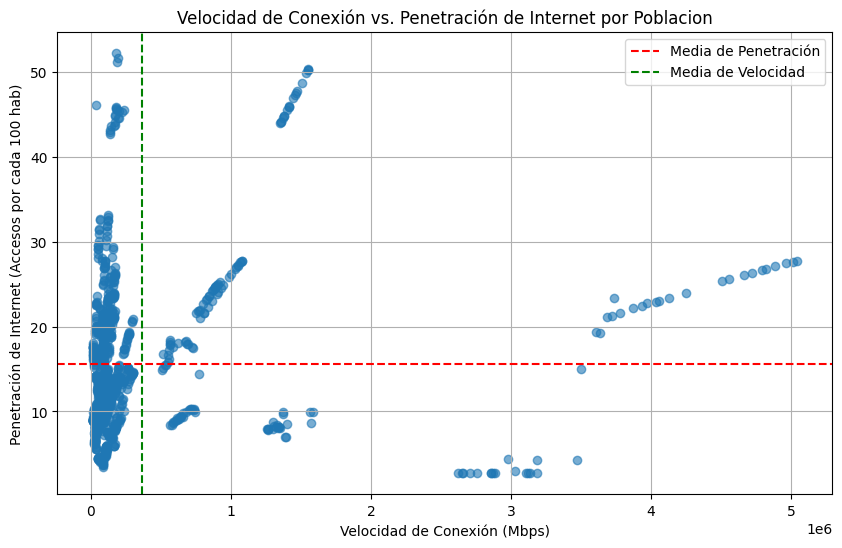

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Cargar el archivo Excel
archivo = '../6._DataSets_Limpio/df_internet_limpio.xlsx'  

# Cargar las hojas específicas
df_velocidad = pd.read_excel(archivo, sheet_name='Accesos_Velocidad')
df_penetracion = pd.read_excel(archivo, sheet_name='Penetracion_Poblacion')

# Verificar que las columnas existen
if 'Total_velocidad' in df_velocidad.columns and 'Accesos por cada 100 hab' in df_penetracion.columns:
    # Extraer las columnas relevantes
    velocidad = df_velocidad['Total_velocidad']
    penetracion = df_penetracion['Accesos por cada 100 hab']

    # Eliminar valores nulos
    df_combined = pd.DataFrame({'Velocidad': velocidad, 'Penetracion': penetracion})
    df_combined = df_combined.dropna()  # Eliminar filas con valores nulos

    # Verificar que ambas columnas tengan la misma longitud
    if len(df_combined['Velocidad']) == len(df_combined['Penetracion']):
        # Calcular el coeficiente de correlación de Pearson
        correlacion, p_valor = pearsonr(df_combined['Velocidad'], df_combined['Penetracion'])

        # Imprimir el resultado
        print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")
        print(f"P-valor: {p_valor:.4f}")

        # Crear un gráfico de dispersión
        plt.figure(figsize=(10, 6))
        plt.scatter(df_combined['Velocidad'], df_combined['Penetracion'], alpha=0.6)
        plt.title('Velocidad de Conexión vs. Penetración de Internet por Poblacion')
        plt.xlabel('Velocidad de Conexión (Mbps)')
        plt.ylabel('Penetración de Internet (Accesos por cada 100 hab)')
        plt.grid(True)
        plt.axhline(y=df_combined['Penetracion'].mean(), color='r', linestyle='--', label='Media de Penetración')
        plt.axvline(x=df_combined['Velocidad'].mean(), color='g', linestyle='--', label='Media de Velocidad')
        plt.legend()
        plt.show()
    else:
        print("Las columnas no tienen la misma longitud después de eliminar los valores nulos.")
else:
    print("Las columnas 'Total_velocidad' o 'Accesos por cada 100 hab' no se encontraron en los DataFrames.")

Un coeficiente de 0.1657 sugiere que hay una correlación positiva débil entre la velocidad de conexión y la penetración de internet. Esto significa que, aunque existe una relación, no es lo suficientemente fuerte como para ser considerada significativa en términos prácticos. Ya que si esta cerca del 1 es una relacion fuerte positiva, peo si esta cerca del -1, es una relacion fuerte Negativa.

2. Identificamos ahora la relacion que pueda existir entre la Velocidad de Conexion a Internet vs. Los Ingresos. Usaremos Graficos de Dispersion, junto al metodo estadistico de Pearson.

Coeficiente de correlación de Pearson: 0.4940
P-valor: 0.0010


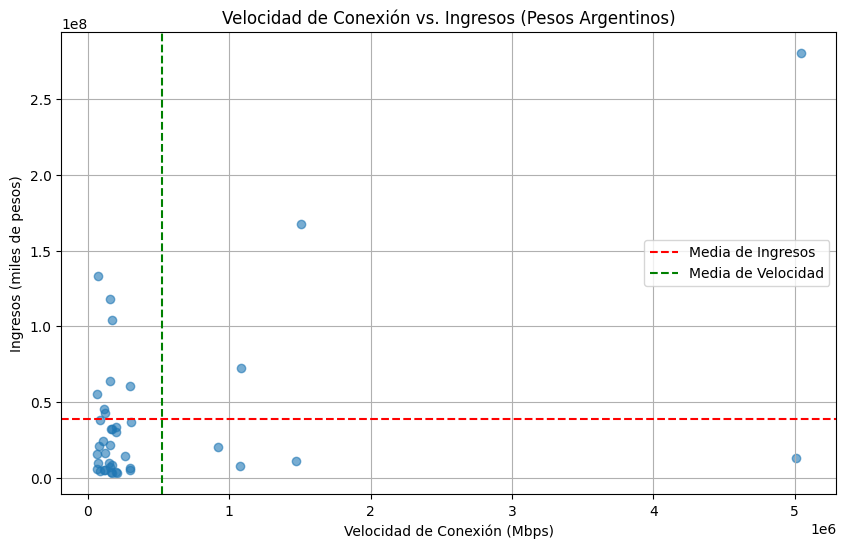

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Cargar el archivo Excel
archivo = '../6._DataSets_Limpio/df_internet_limpio.xlsx'  

# Cargar las hojas específicas
df_velocidad = pd.read_excel(archivo, sheet_name='Accesos_Velocidad')
df_ingresos = pd.read_excel(archivo, sheet_name='Ingresos')

# Verificar que las columnas existen
if 'Total_velocidad' in df_velocidad.columns and 'Ingresos (miles de pesos)' in df_ingresos.columns:
    # Extraer las columnas relevantes
    velocidad = df_velocidad['Total_velocidad']
    ingresos = df_ingresos['Ingresos (miles de pesos)']

    # Eliminar valores nulos
    df_combined = pd.DataFrame({'Velocidad': velocidad, 'Ingresos': ingresos})
    df_combined = df_combined.dropna()  # Eliminar filas con valores nulos

    # Verificar que ambas columnas tengan la misma longitud
    if len(df_combined['Velocidad']) == len(df_combined['Ingresos']):
        # Calcular el coeficiente de correlación de Pearson
        correlacion, p_valor = pearsonr(df_combined['Velocidad'], df_combined['Ingresos'])

        # Imprimir el resultado
        print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")
        print(f"P-valor: {p_valor:.4f}")

        # Crear un gráfico de dispersión
        plt.figure(figsize=(10, 6))
        plt.scatter(df_combined['Velocidad'], df_combined['Ingresos'], alpha=0.6)
        plt.title('Velocidad de Conexión vs. Ingresos (Pesos Argentinos)')
        plt.xlabel('Velocidad de Conexión (Mbps)')
        plt.ylabel('Ingresos (miles de pesos)')
        plt.grid(True)
        plt.axhline(y=df_combined['Ingresos'].mean(), color='r', linestyle='--', label='Media de Ingresos')
        plt.axvline(x=df_combined['Velocidad'].mean(), color='g', linestyle='--', label='Media de Velocidad')
        plt.legend()
        plt.show()
    else:
        print("Las columnas no tienen la misma longitud después de eliminar los valores nulos.")
else:
    print("Las columnas 'Total_velocidad' o 'Ingresos (miles de pesos)' no se encontraron en los DataFrames.")

Un coeficiente de 0.4940 sugiere que hay una correlación positiva moderada entre la velocidad de conexión y los ingresos. Esto significa que, en general, a medida que la velocidad de conexión aumenta, los ingresos tienden a aumentar también, aunque no de manera perfectamente lineal.

3. Identificamos la Relacion existente entre las distintas Tecnologías de acceso a Internet con los ingresos por cada Provincia en Argentina.

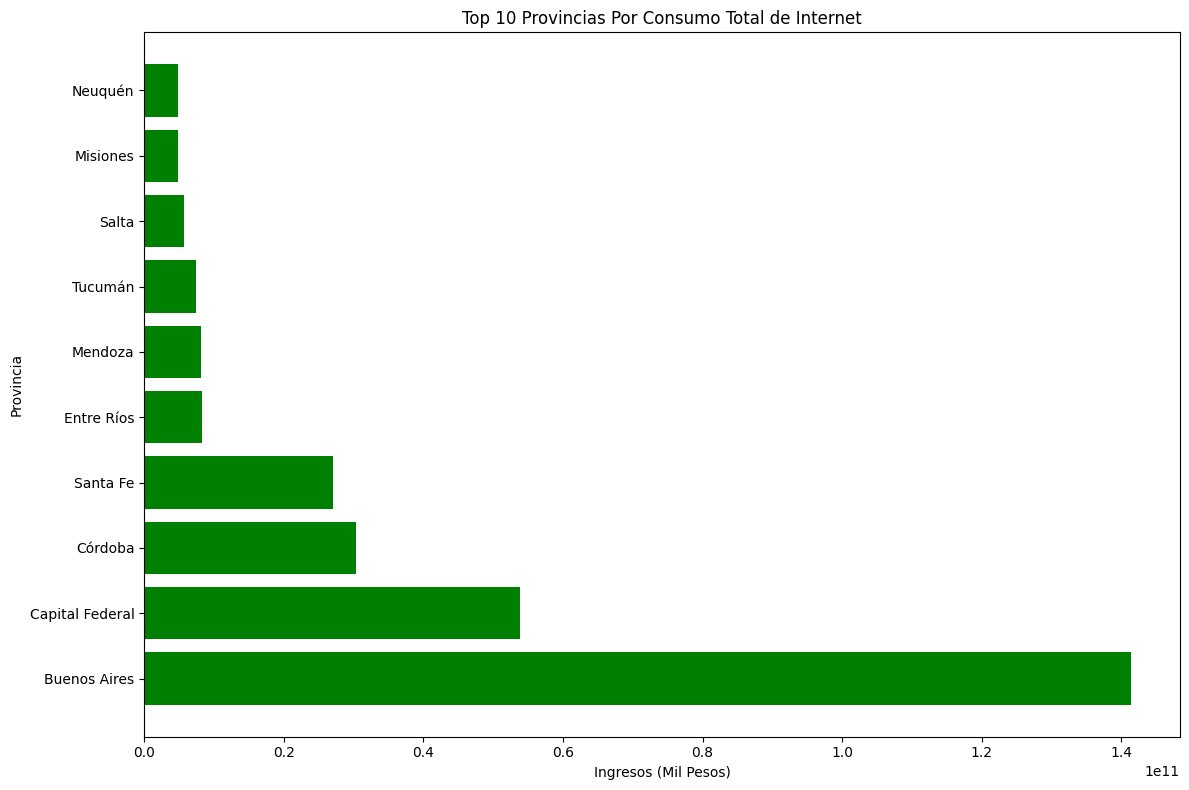

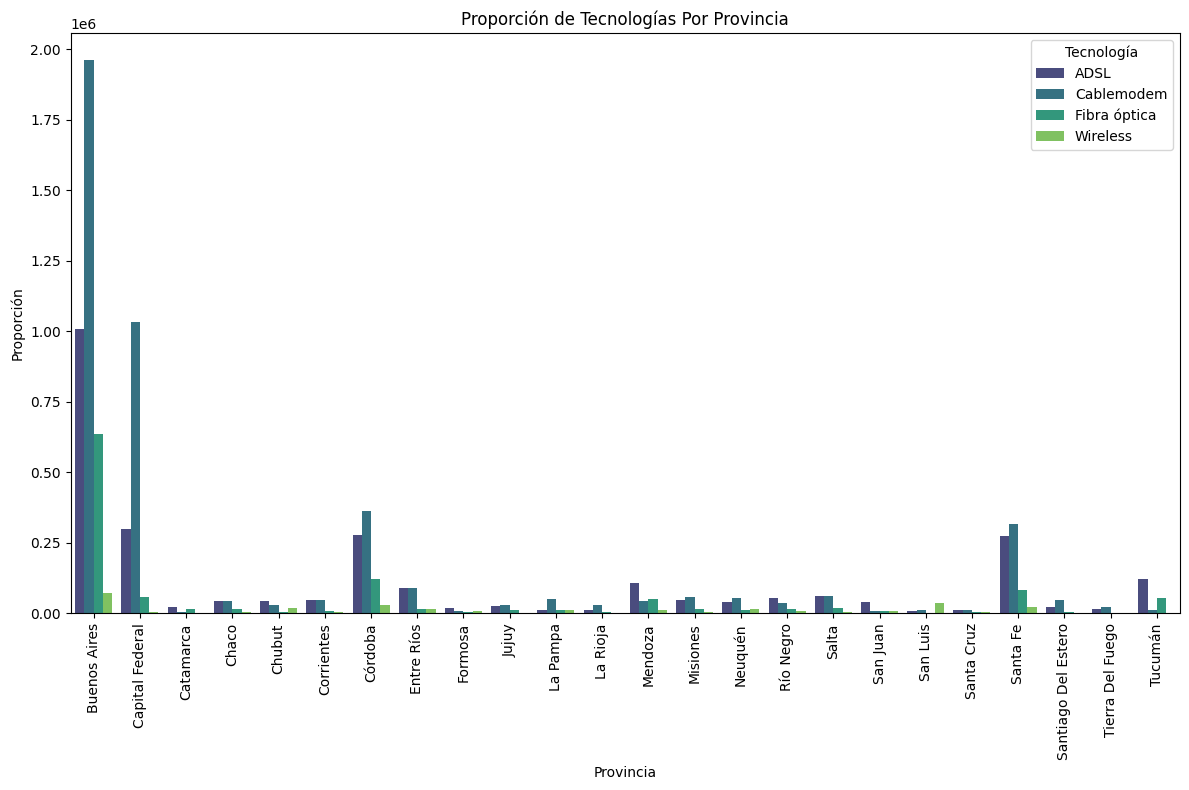

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_datos():
    # Cargar los datos desde ambas hojas del Excel
    df_ingresos = pd.read_excel('../6._DataSets_Limpio/df_internet_limpio.xlsx', sheet_name='Ingresos')
    df_tecnologia = pd.read_excel('../6._DataSets_Limpio/df_internet_limpio.xlsx', sheet_name='Acceso_Tecnologia')

    # Convertir las columnas Año y Trimestre a formato datetime
    df_ingresos['Año'] = pd.to_datetime(df_ingresos['Año'], errors='coerce')
    df_ingresos['Trimestre'] = pd.to_datetime(df_ingresos['Trimestre'], errors='coerce', format='%b-%y')

    df_tecnologia['Año'] = pd.to_datetime(df_tecnologia['Año'], errors='coerce')
    df_tecnologia['Trimestre'] = pd.to_datetime(df_tecnologia['Trimestre'], errors='coerce', format='%b-%y')

    return df_ingresos, df_tecnologia

def crear_visualizaciones(df_ingresos, df_tecnologia):
    # Gráfico barras horizontales para mostrar el consumo total por provincia
    ingresos_por_provincia = df_tecnologia.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Total_tecnologia']].sum().reset_index()
    ingresos_por_provincia['Ingresos'] = ingresos_por_provincia['Total_tecnologia'] * 1000  # Convertir a miles de pesos

    ingresos_por_provincia = ingresos_por_provincia.sort_values('Ingresos', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    plt.barh(ingresos_por_provincia['Provincia'], ingresos_por_provincia['Ingresos'], color='green')
    plt.title('Top 10 Provincias Por Consumo Total de Internet')
    plt.xlabel('Ingresos (Mil Pesos)')
    plt.ylabel('Provincia')
    plt.tight_layout()
    plt.show()

    # Gráfico barras para mostrar la proporción de tecnologías por provincia
    propor_ción_technología_por_provincia = df_tecnologia.groupby(['Provincia'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].mean().reset_index()
    propor_ción_technología_por_provincia['Total'] = propor_ción_technología_por_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].sum(axis=1)
    propor_ción_technología_por_provincia_melt = pd.melt(propor_ción_technología_por_provincia, id_vars=['Provincia'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'])

    plt.figure(figsize=(12, 8))
    sns.barplot(data=propor_ción_technología_por_provincia_melt, x='Provincia', y='value', hue='variable', palette='viridis')
    plt.title('Proporción de Tecnologías Por Provincia')
    plt.xlabel('Provincia')
    plt.ylabel('Proporción')
    plt.legend(title='Tecnología')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Ejecutar la función cargar_datos()
df_ingresos, df_tecnologia = cargar_datos()

# Luego ejecuta las funciones de visualización si necesitas
crear_visualizaciones(df_ingresos, df_tecnologia)


Estos hallazgos sugieren que Buenos Aires es el centro del consumo de internet y la generación de ingresos relacionados con internet en Argentina, probablemente debido a su gran población e importancia económica. La distribución de tecnologías en Buenos Aires proporciona información sobre los tipos de servicios de internet más comúnmente utilizados en la provincia.

4. Identificamos la Relacion entre Accesos por Tecnologia y la Penetracion por Poblacion. Usaremos Graficos de Barras, de Area y Dispersion.

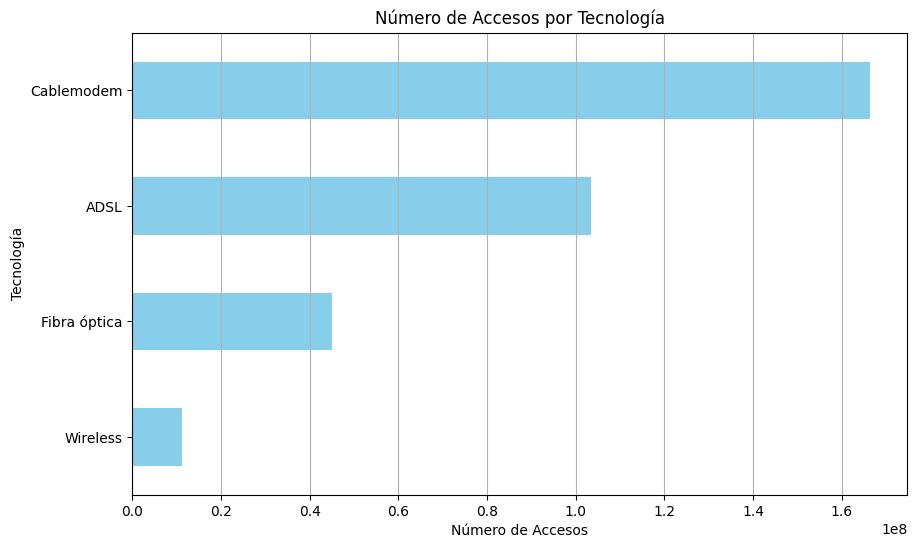

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
archivo = '../6._DataSets_Limpio/df_internet_limpio.xlsx'  

# Cargar las hojas específicas
df_tecnologia = pd.read_excel(archivo, sheet_name='Acceso_Tecnologia')
df_penetracion = pd.read_excel(archivo, sheet_name='Penetracion_Poblacion')

# Verificar que las columnas existen
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
for tecnologia in tecnologias:
    if tecnologia not in df_tecnologia.columns:
        print(f"La columna '{tecnologia}' no se encontró en el DataFrame de tecnología.")

if 'Accesos por cada 100 hab' not in df_penetracion.columns:
    print("La columna 'Accesos por cada 100 hab' no se encontró en el DataFrame de penetración.")

# 1. Gráfico de barras horizontales para visualizar las tecnologías más usadas
tecnologia_counts = df_tecnologia[tecnologias].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
tecnologia_counts.plot(kind='barh', color='skyblue')
plt.title('Número de Accesos por Tecnología')
plt.xlabel('Número de Accesos')
plt.ylabel('Tecnología')
plt.grid(axis='x')
plt.show()


El cablemodem ha sido una de las tecnologías de acceso a Internet más utilizadas en Argentina, especialmente en áreas urbanas. 

<Figure size 1200x600 with 0 Axes>

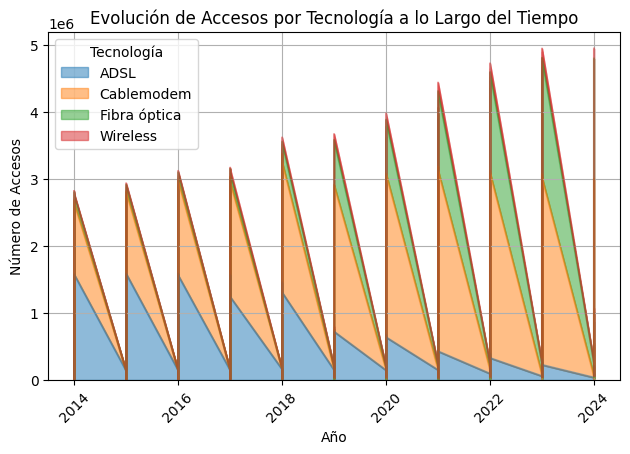

In [27]:
# Creamos un gráfico de área para saber la evolucion que ha tenido el acceso a internet a los largo del Tiempo

plt.figure(figsize=(12, 6))
df_tecnologia.set_index('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].plot(kind='area', alpha=0.5)

plt.title('Evolución de Accesos por Tecnología a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El cablemodem ha competido fuertemente con otras tecnologías como ADSL y fibra óptica. Su penetración ha sido significativa en regiones con infraestructura de cable. Las velocidades ofrecidas por el cablemodem suelen ser superiores a las del ADSL, lo que lo hace atractivo para usuarios que requieren conexiones más rápidas. En la actualidad presenta un desafio y es que la competencia con la fibra óptica ha aumentado, ya que esta última ofrece velocidades más altas y menor latencia.

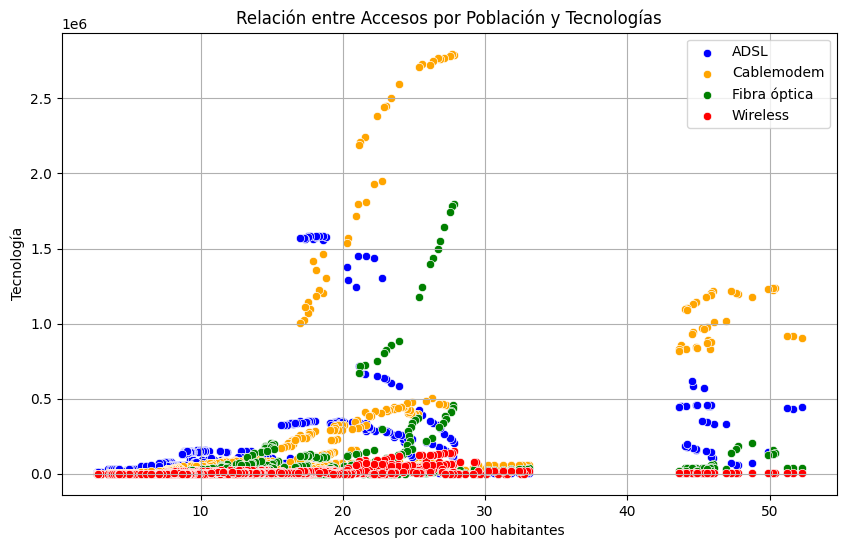

In [19]:
# Analizamos la relacion entre las Distintas tecnologias y los accesos por Poblacion

import seaborn as sns

# df_penetracion esté cargado
df_penetracion = pd.read_excel(archivo, sheet_name='Penetracion_Poblacion')

# Combinar datos para el gráfico
df_combined = pd.concat([df_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']], 
                          df_penetracion['Accesos por cada 100 hab']], axis=1)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Accesos por cada 100 hab', y='ADSL', label='ADSL', color='blue')
sns.scatterplot(data=df_combined, x='Accesos por cada 100 hab', y='Cablemodem', label='Cablemodem', color='orange')
sns.scatterplot(data=df_combined, x='Accesos por cada 100 hab', y='Fibra óptica', label='Fibra óptica', color='green')
sns.scatterplot(data=df_combined, x='Accesos por cada 100 hab', y='Wireless', label='Wireless', color='red')

plt.title('Relación entre Accesos por Población y Tecnologías')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Tecnología')
plt.legend()
plt.grid(True)
plt.show()

El cablemodem es la tecnologia para acceder a Internet mas usada en la Argentina, pero la tecnologia por Fibra Optica esta ganando campo Rapidamente.

5. Ahora al saber cuales son las Tecnologias mas Comunes, las que generan mayor ingreso y las Provincias donde mas las Usan. Quiero saber el Porque? Tienen altas Velocidades? La relacion Velocidad vs Pago es equilibrada? 

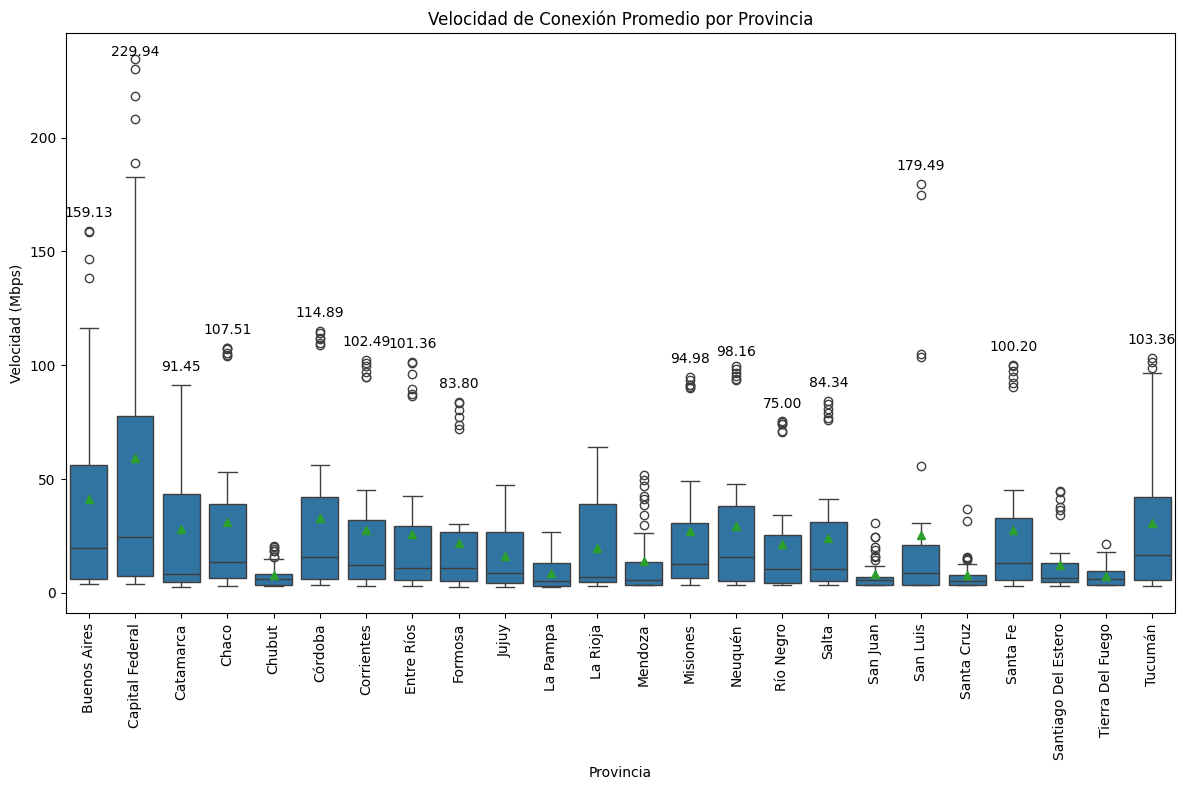

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_datos():
    df_velocidad = pd.read_excel('../6._DataSets_Limpio/df_internet_limpio.xlsx', sheet_name='Velocidad')
    
    # Convertir las columnas Año y Trimestre a formato datetime
    df_velocidad['Año'] = pd.to_datetime(df_velocidad['Año'], errors='coerce')
    df_velocidad['Trimestre'] = pd.to_datetime(df_velocidad['Trimestre'], errors='coerce', format='%b-%y')

    return df_velocidad

def crear_visualizacion_velocidad(df_velocidad):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_velocidad, x='Provincia', y='Mbps (Media de bajada)', showmeans=True)
    
    # Añadir etiquetas a los outliers
    for i, outlier in enumerate(df_velocidad['Mbps (Media de bajada)']):
        if (outlier < df_velocidad['Mbps (Media de bajada)'].quantile(0.25) - 1.5 * df_velocidad['Mbps (Media de bajada)'].quantile(0.75) - df_velocidad['Mbps (Media de bajada)'].quantile(0.25)) or \
           (outlier > df_velocidad['Mbps (Media de bajada)'].quantile(0.75) + 1.5 * df_velocidad['Mbps (Media de bajada)'].quantile(0.75) - df_velocidad['Mbps (Media de bajada)'].quantile(0.25)):
            plt.annotate(f"{outlier:.2f}", (i, outlier), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title('Velocidad de Conexión Promedio por Provincia')
    plt.xlabel('Provincia')
    plt.ylabel('Velocidad (Mbps)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Ejecutar la función cargar_datos()
df_velocidad = cargar_datos()

# Crear visualización de velocidad
crear_visualizacion_velocidad(df_velocidad)

Los outliers en un boxplot son valores extremos que se encuentran fuera del rango normal de los datos. En el contexto de un boxplot, los outliers se representan como puntos individuales fuera de los bigotes (whiskers) del gráfico. Estos puntos representan valores que son significativamente más altos o más bajos que el resto de los datos.

Este gráfico proporciona una visualización más clara de los outliers, mostrando sus valores exactos. Esto permitirá identificar fácilmente cuáles son los valores extremos y en qué provincias se encuentran.

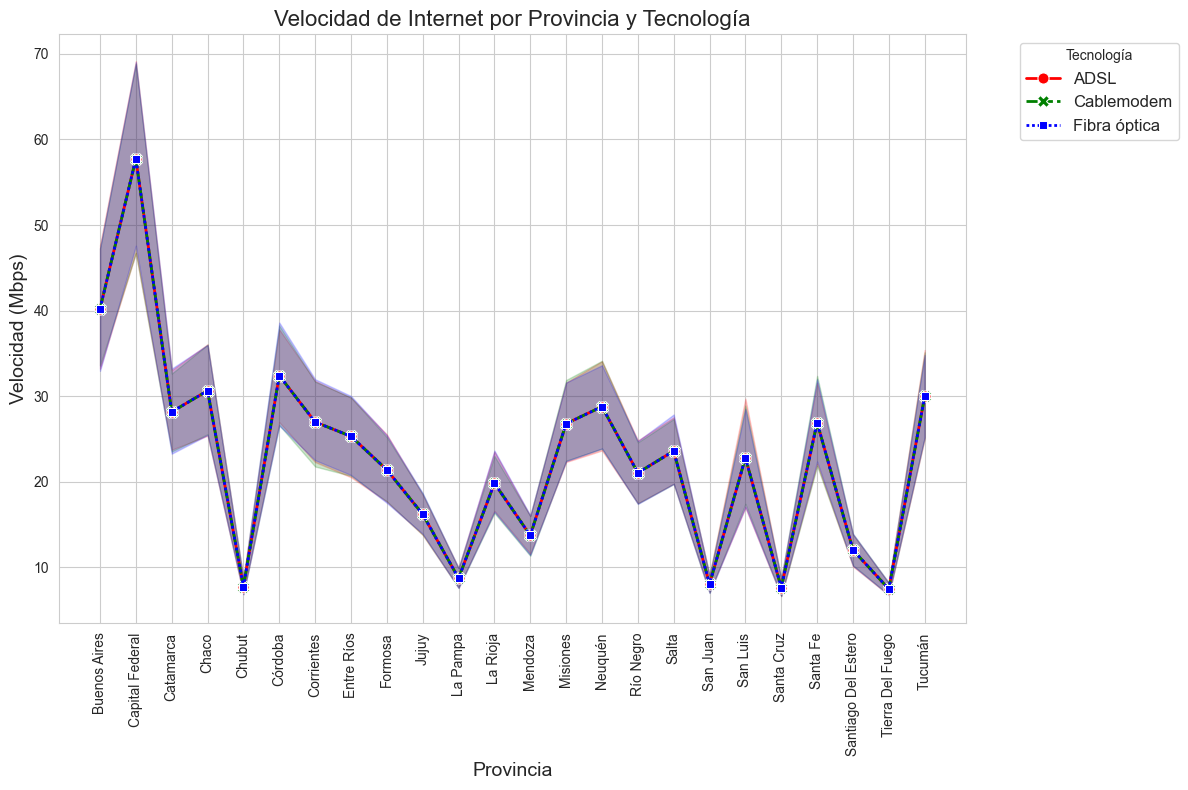

In [74]:
# Comparacion entre las velocidades de Internet por Provincia y el tipo de Tecnologia.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_datos():
    df_tecnologia = pd.read_excel('../6._DataSets_Limpio/df_internet_limpio.xlsx', sheet_name='Acceso_Tecnologia')
    df_velocidad = pd.read_excel('../6._DataSets_Limpio/df_internet_limpio.xlsx', sheet_name='Velocidad')
    
    # Convertir las columnas Año y Trimestre a formato datetime
    df_tecnologia['Año'] = pd.to_datetime(df_tecnologia['Año'], errors='coerce')
    df_tecnologia['Trimestre'] = pd.to_datetime(df_tecnologia['Trimestre'], errors='coerce', format='%b-%y')
    
    df_velocidad['Año'] = pd.to_datetime(df_velocidad['Año'], errors='coerce')
    df_velocidad['Trimestre'] = pd.to_datetime(df_velocidad['Trimestre'], errors='coerce', format='%b-%y')

    return df_tecnologia, df_velocidad

def crear_visualizacion_velocidad_tecnologia(df_tecnologia, df_velocidad):
    # Fusionar los datos
    df_combinado = pd.merge(df_tecnologia, df_velocidad, on=['Año', 'Trimestre', 'Provincia'])
    
    # Preparar los datos para el gráfico
    df_melt = pd.melt(df_combinado, id_vars=['Provincia', 'Año', 'Trimestre', 'Mbps (Media de bajada)'],
                      value_vars=['ADSL', 'Cablemodem', 'Fibra óptica'],
                      var_name='Tecnología', value_name='Proporción')
    
    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    sns.lineplot(data=df_melt, x='Provincia', y='Mbps (Media de bajada)', hue='Tecnología', style='Tecnología', markers=True, 
                 palette=['red', 'green', 'blue'], linewidth=2, markersize=8)
    plt.title('Velocidad de Internet por Provincia y Tecnología', fontsize=16)
    plt.xlabel('Provincia', fontsize=14)
    plt.ylabel('Velocidad (Mbps)', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# Ejecutar la función cargar_datos()
df_tecnologia, df_velocidad = cargar_datos()

# Crear visualización de velocidad y tecnología
crear_visualizacion_velocidad_tecnologia(df_tecnologia, df_velocidad)

Respuestas en nuestras visualizaciones.

- Distribución de tecnologías:

Fibra óptica: Es la tecnología que maneja velocidades mucho más altas. La mayoría de las líneas en el gráfico son de color azul, lo que indica que la fibra óptica tiene velocidades significativamente superiores a las otras tecnologías.

- Velocidades de las tecnologías:

Fibra óptica: Muestra las velocidades más altas en general.
Cablemodem: Aunque es la tecnología más usada, sus velocidades son muy bajas en comparación con la fibra óptica.
ADSL: Sus velocidades se encuentran en un rango intermedio, pero generalmente más bajas que la fibra óptica.

- Tendencias generales:

La fibra óptica parece ser la tecnología más avanzada y de mayor rendimiento en términos de velocidad.
El cablemodem, a pesar de ser el más utilizado, muestra velocidades relativamente bajas, pero su alta adopción sugiere que es probablemente la opción más económica.
El ADSL se encuentra en una posición intermedia, tanto en velocidad como en adopción.

- Implicaciones económicas:

La alta adopción del cablemodem a pesar de sus bajas velocidades sugiere que es la opción más accesible económicamente para muchos usuarios.
La fibra óptica, aunque ofrece las mejores velocidades, podría ser más costosa, lo que limita su adopción a pesar de sus ventajas técnicas.
El ADSL ocupa una posición intermedia en términos de velocidad y probablemente de costo, lo que explica su presencia en el mercado.

- Oportunidades de mejora:

Los proveedores de servicios de internet podrían considerar ofrecer opciones de cablemodem con velocidades mejoradas a precios competitivos.
La expansión de la fibra óptica a más áreas podría ser beneficiosa para mejorar las velocidades generales, pero dependería de la viabilidad económica.
La educación del consumidor sobre las diferencias en velocidad y costo entre las tecnologías podría ayudar a los usuarios a tomar decisiones informadas basadas en sus necesidades y presupuesto.